In [2]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# документация для ЦМ
# https://quanteconpy.readthedocs.io/en/stable/markov/core.html

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$


$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [3]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))

In [4]:
P = np.array(P)

In [5]:
P

array([[0.971, 0.029, 0.   ],
       [0.145, 0.778, 0.077],
       [0.   , 0.508, 0.492]])

In [6]:
mc1 = qe.MarkovChain(P)

In [7]:
# Метод генерирует цепь Маркова длиной 50 и любым начальным 
# состоянием 0
k=mc1.simulate(500000, init=0)

In [8]:
k

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
def transition_matrix(transitions):
 n = 1+ max(transitions) #number of states

 M = [[0]*n for _ in range(n)]

 for (i,j) in zip(transitions,transitions[1:]):
  M[i][j] += 1

 #now convert to probabilities:
 for row in M:
  s = sum(row)
  if s > 0:
   row[:] = [f/s for f in row]
 return M

#test:

m = transition_matrix(k)
for row in m: print(' '.join('{0:.3f}'.format(x) for x in row))

0.971 0.029 0.000
0.147 0.777 0.076
0.000 0.519 0.481


In [10]:
print(P)

[[0.971 0.029 0.   ]
 [0.145 0.778 0.077]
 [0.    0.508 0.492]]


# Примеры решения задач

# Задача идентификации модели по последовательности состояний системы

In [11]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [12]:
import codecs
file = codecs.open("alice_ru.txt", "r", "utf-8" )
text = file.read()

In [13]:
text[:1000]

"Июльский полдень золотой\n    Сияет так светло,\n    В неловких маленьких руках\n    Упрямится весло,\n    И нас теченьем далеко\n    От дома унесло.\n\n    Безжалостные! В жаркий день,\n    В такой сонливый час,\n    Когда бы только подремать,\n    Не размыкая глаз,\n    Вы требуете, чтобы я\n    Придумывал рассказ.\n\n    И Первая велит начать\n    Его без промедленья,\n    Вторая просит: ``Поглупей\n    Пусть будут приключенья''.\n    А Третья прерывает нас\n    Сто раз в одно мгновенье.\n\n    Но вот настала тишина,\n    И, будто бы во сне,\n    Неслышно девочка идет\n    По сказочной стране\n    И видит множество чудес\n    В подземной глубине.\n\n    Но ключ фантазии иссяк --\n    Не бьет его струя.\n    -- Конец я после расскажу,\n    Даю вам слово я!\n    -- Настало после! -- мне кричит\n    Компания моя.\n\n    И тянется неспешно нить\n    Моей волшебной сказки,\n    К закату дело, наконец,\n    Доходит до развязки.\n    Идем домой. Вечерний луч\n    Смягчил дневные краски.\n

In [14]:
text = re.sub('[^а-я]','', text)

In [15]:
text

'юльскийполденьзолотойияеттаксветлонеловкихмаленькихрукахпрямитсявеслонастеченьемдалекотдомаунеслоезжалостныежаркийденьтакойсонливыйчасогдабытолькоподрематьеразмыкаяглазытребуетечтобыяридумывалрассказерваявелитначатьгобезпромедленьятораяпроситоглупейустьбудутприключеньяретьяпрерываетнасторазводномгновеньеовотнасталатишинабудтобывоснееслышнодевочкаидетосказочнойстраневидитмножествочудесподземнойглубинеоключфантазиииссякебьетегоструяонецяпослерасскажуаювамсловояасталопослемнекричитомпаниямоятянетсянеспешнонитьоейволшебнойсказкизакатуделонаконецоходитдоразвязкидемдомойечернийлучмягчилдневныекраскилисасказкудетскихднейранидосединытомтайникегдетыхранишьладенческиесныакстранникбережетцветокалекойсторонылавалисенаскучилосидетьссестройбезделанаберегурекиразокдругойоназаглянулавкнижкукоторуючиталасестранотамнебылоникартинокниразговоровтотолкувкнижкеподумалалисаесливнейнетникартинокниразговоровнасиделаиразмышляланевстатьлиейиненарватьлицветовдлявенкамыслиеетеклимедленноинесвязноотжарыееклониловс

In [16]:
# определим алфавит
ENGLISH = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
# создадим словарь с ключами буквами и значениями - номерами от 0
POS = {l: i for i, l in enumerate(ENGLISH)}
POS


{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ё': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32}

In [17]:
# создадим пока матрицу из нолей, куда запишем вероятности переходов
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))


In [18]:

# бежим по символам (берем предыдущий и текущий)
for cp, cn in zip(text[:-1], text[1:]):
    # счетчик набегает по количеству встреченных переходов
    probabilities[POS[cp], POS[cn]] += 1

In [19]:
# имеем все тот же массим, но заполненный целыми числами
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])


97.0
434.0
170.0


In [20]:

# делим значения в столбцах матрицы на общее кол-во встреченных переходов от всех букв к рассмтариваемой
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

probabilities

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([[0.01032684, 0.01277547, 0.05567976, ..., 0.00404557, 0.011285  ,
        0.02757373],
       [0.05409357, 0.00146199, 0.00365497, ..., 0.00584795, 0.        ,
        0.0504386 ],
       [0.19212772, 0.00137627, 0.00853289, ..., 0.00330306, 0.        ,
        0.00522984],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01631702, 0.07459207, 0.03962704, ..., 0.00699301, 0.004662  ,
        0.002331  ],
       [0.01901566, 0.0212528 , 0.06040268, ..., 0.00894855, 0.0033557 ,
        0.0139821 ]])

In [21]:

# получили массим, в котором указаны вероятности (количество благоприятных исходов ко всем исходам)
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])
print(probabilities.shape )

0.010326839135526455
0.11946050096339114
0.06004945249028612
(33, 33)


In [22]:
# переводим все это в датафрейм
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

In [23]:
df.head()

,а,б,в,г,д,е,ё,ж,з,и,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.010327,0.012775,0.055680,0.011604,0.039285,0.029703,0.0,0.015650,0.074098,0.019802,...,0.000639,0.026296,0.010859,0.003939,0.000000,0.003300,0.000000,0.004046,0.011285,0.027574
б,0.054094,0.001462,0.003655,0.000000,0.002924,0.151316,0.0,0.000731,0.000000,0.071637,...,0.000000,0.000000,0.000000,0.006579,0.012427,0.271930,0.003655,0.005848,0.000000,0.050439
в,0.192128,0.001376,0.008533,0.006056,0.019543,0.132397,0.0,0.001376,0.020919,0.082026,...,0.000826,0.005780,0.012386,0.000000,0.000000,0.057253,0.004129,0.003303,0.000000,0.005230
г,0.059645,0.003173,0.005711,0.000000,0.085025,0.008249,0.0,0.000000,0.003173,0.053299,...,0.000635,0.004442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000635
д,0.173262,0.004226,0.033039,0.001537,0.004226,0.187476,0.0,0.000000,0.002689,0.074529,...,0.010373,0.001153,0.000000,0.000000,0.000000,0.024203,0.020361,0.000384,0.002305,0.012294


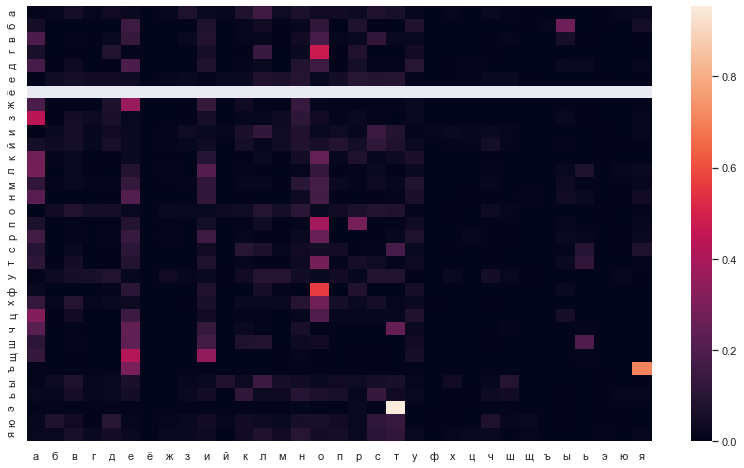

In [24]:
# строим тепловую карту. Высокое значение для последовательности 
#"qu". 
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [25]:

# Посчитаем вероятность начального состояния цепи для букв англ алфавита

In [26]:
# посчитаем число уникальных слов
len(set(text.split(' ')))

1

In [27]:
# грубо прикинем для каждой буквы вероятность того, что с нее начинается случайное слово
unique_words = list(set(text.split(' ')))
unique_words[:10]

['юльскийполденьзолотойияеттаксветлонеловкихмаленькихрукахпрямитсявеслонастеченьемдалекотдомаунеслоезжалостныежаркийденьтакойсонливыйчасогдабытолькоподрематьеразмыкаяглазытребуетечтобыяридумывалрассказерваявелитначатьгобезпромедленьятораяпроситоглупейустьбудутприключеньяретьяпрерываетнасторазводномгновеньеовотнасталатишинабудтобывоснееслышнодевочкаидетосказочнойстраневидитмножествочудесподземнойглубинеоключфантазиииссякебьетегоструяонецяпослерасскажуаювамсловояасталопослемнекричитомпаниямоятянетсянеспешнонитьоейволшебнойсказкизакатуделонаконецоходитдоразвязкидемдомойечернийлучмягчилдневныекраскилисасказкудетскихднейранидосединытомтайникегдетыхранишьладенческиесныакстранникбережетцветокалекойсторонылавалисенаскучилосидетьссестройбезделанаберегурекиразокдругойоназаглянулавкнижкукоторуючиталасестранотамнебылоникартинокниразговоровтотолкувкнижкеподумалалисаесливнейнетникартинокниразговоровнасиделаиразмышляланевстатьлиейиненарватьлицветовдлявенкамыслиеетеклимедленноинесвязноотжарыееклонилов

In [28]:
# удалим первый элемент
#del unique_words[0]

In [29]:

# посчитаем, сколько уникальных слов начинается на каждую букву
count_dict = {i:len(list(filter(lambda word: word[0] == i, unique_words))) for i in ENGLISH}
count_dict

{'а': 0,
 'б': 0,
 'в': 0,
 'г': 0,
 'д': 0,
 'е': 0,
 'ё': 0,
 'ж': 0,
 'з': 0,
 'и': 0,
 'й': 0,
 'к': 0,
 'л': 0,
 'м': 0,
 'н': 0,
 'о': 0,
 'п': 0,
 'р': 0,
 'с': 0,
 'т': 0,
 'у': 0,
 'ф': 0,
 'х': 0,
 'ц': 0,
 'ч': 0,
 'ш': 0,
 'щ': 0,
 'ъ': 0,
 'ы': 0,
 'ь': 0,
 'э': 0,
 'ю': 1,
 'я': 0}

In [30]:
# Можно проанализировать аномалии

In [31]:

# преобразуем значения в массив
prob_array =  np.array(list(count_dict.values()))
prob_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [32]:
# чтобы посчитать вероятности
prob_array = prob_array / np.sum(prob_array)

In [33]:

prob_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

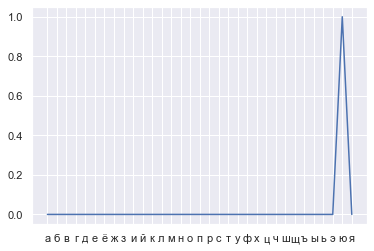

In [35]:
x = [x for x in ENGLISH]
y = prob_array
plt.plot(x,y)

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос дает теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

In [36]:
string = "привет"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

8.672732910406807e-10


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "п" и заканчивается на букву "р"?

In [37]:
start = POS['п']
end = POS['р']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['п', c,c, 'р']), proba)

паар 6.303535867199167e-05
пггр 9.469962128636573e-07
пеер 0.00026260047741774026
пиир 2.5128535766833643e-05
пккр 8.744987024343406e-06
пллр 9.063659636775301e-06
пммр 1.0664799900092156e-07
пннр 7.523721635992642e-07
поор 0.0007939363476412567
пппр 6.840175286877611e-06
пррр 8.747979278455721e-06
псср 1.0780793003869066e-07
пттр 1.1678017501745862e-05
пуур 1.6325923017541397e-05
пццр 5.611360536086939e-07
пщщр 4.7950715870622446e-08
пыыр 1.588417062140715e-05
пььр 4.296493120907478e-07
пяяр 1.0657609781794655e-05


Это работает не всегда. Почему же? Потому что никто не обещал, что переходная вероятность не зависит от шага. Если она действительно не зависит, то говорят, что марковская цепь однородна.

# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [38]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

белитглоп


Задача 2: проранжировать страницы сайта

In [40]:
%%file web_graph_data_2.txt
1 -> 7;
7 -> 1;
1 -> 6;
6 -> 7;
7 -> 4;
4 -> 7;
4 -> 1;
3 -> 4;
2 -> 4;
2 -> 3;
3 -> 2;
1 -> 2;
4 -> 1;
1 -> 5;
5 -> 1;

Overwriting web_graph_data_2.txt


In [ ]:
import numpy as np
from operator import itemgetter         

infile = 'web_graph_data_2.txt'              # ввод файла данных
alphabet = '1234567'    # 

n = 14
Q = np.zeros((n, n), dtype=int)            # вернуть новый массив заданной формы и типа, заполненный нулями (матрица n на n)
f = open(infile, 'r')                      
edges = f.readlines()                      # возвращает список, содержащий строки файла;
f.close()                                  
for edge in edges:                          
    from_node, to_node = re.findall('\w', edge)    # перебрать строки файла: вернуть список всех совпадений за один шаг
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
P = np.empty((n, n))                      # вернуть новый массив заданной формы и типа, без инициализации записей
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()     # Построить P (i, j)
mc = qe.MarkovChain(P)
r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}

print('Rankings\n ***')                   # сортируем полученный список
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print (f'{name}: {rank:.4}')